
Cross-Validation Scores: [0.98245614 0.87719298 0.94736842 0.92982456 1.         0.98245614
 0.94736842 0.98245614 0.94736842 1.        ]

Average Cross-Validation Score: 0.9596491228070174
F1 score: 0.9516129032258064
Recall: 0.9365079365079365
Precision: 0.9672131147540983
AUC: 0.958994708994709
Balanced accuracy: 0.9589947089947091


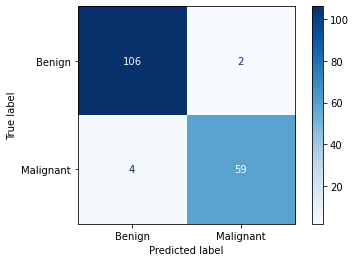

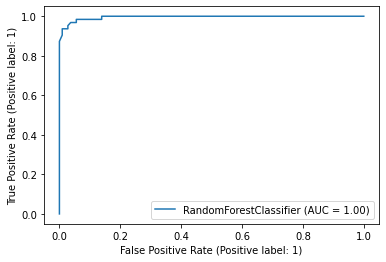

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, recall_score, precision_score, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score


# Load data from the CSV file
data = pd.read_csv('breast-cancer.csv')

# Separating features and target variable
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0}) # convert to 0 and 1 labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest classifier with default parameters
clf = RandomForestClassifier(random_state = 1)

k = 10
cv_scores = cross_val_score(clf, X, y, cv=k)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = clf.predict(X_test)

# Output for Cross Validation 
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())

# Outputs of the performance metrics
print("F1 score:", float(f1_score(y_test, y_pred)))
print("Recall:", float(recall_score(y_test, y_pred)))
print("Precision:", float(precision_score(y_test, y_pred)))
print("AUC:", float(roc_auc_score(y_test, y_pred)))
print("Balanced accuracy:", float(balanced_accuracy_score(y_test, y_pred)))


# Confusion matrix
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Benign', 'Malignant'], cmap=plt.cm.Blues)
plt.show()

# ROC curve
plot_roc_curve(clf, X_test, y_test)
plt.show()
